**Importing all the necessary libraries**

In [ ]:
import pandas as pd
import glob
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from pathlib import Path
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

**Read the csv file using pandas**

In [ ]:
df = pd.read_csv("C:\\Users\\Satyam Kumar\\Downloads\\Data\\Labels\\Train_DefectBoxes_PrithviAI.csv")

In [ ]:
df.head()

,image_id,X,Y,W,H
0,000003.png,0.471313,0.7165,0.776611,0.267
1,000005.png,0.512085,0.5600,0.665771,0.234
2,000008.png,0.493286,0.7330,0.732666,0.220
3,000010.png,0.505615,0.0900,0.682129,0.134
4,000013.png,0.474609,0.5435,0.760254,0.253


**Check for null values**

In [ ]:
df.isna().sum()        # found 1 nan value for image_id

  image_id    1
X             0
Y             0
W             0
H             0
dtype: int64

**Drop the null value**

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

  image_id    0
X             0
Y             0
W             0
H             0
dtype: int64

In [ ]:
df.columns          # extract name of coulmn (here I found that one column name is "  image_id" so it must be updated before further pre-processing)

Index(['  image_id', 'X', 'Y', 'W', 'H'], dtype='object')

In [ ]:
df.rename(columns={'  image_id': "image_id"}, inplace = True)

In [ ]:
df.columns

Index(['image_id', 'X', 'Y', 'W', 'H'], dtype='object')

In [ ]:
img = cv2.imread("C:\\Users\\Satyam Kumar\\Downloads\\Data\\Images\\" + "000003.png", cv2.IMREAD_COLOR)          

In [ ]:
img.shape           # total number of image mentioned in csv file 

(1000, 4096, 3)

In [ ]:
df.loc[df["image_id"] == "000003.png", "Y"].iloc[0]                # extra the Y value of image = 000003.png

0.7165

In [ ]:
image = []                         # used to store image data
img_indexes = []                   # used to store image name
startX = []                        # used to store X co-ordinate of bounding box 
startY = []                        # used to store Y co-ordinate of bounding box
endX = []                          # used to store W co-ordinate of bounding box   
endY=[]                            # used to store H co-ordinate of bounding box
for i in df["image_id"]:
    if ((Path.cwd() / "C:\\Users\\Satyam Kumar\\Downloads\\Data\\Images\\" / i).exists() == True):  #check image exists or not
        img = cv2.imread("C:\\Users\\Satyam Kumar\\Downloads\\Data\\Images\\" + i, cv2.IMREAD_COLOR)
        
        img = cv2.resize(img, (224,224))                                 #resize image 
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) 
        image.append(img)
        startX.append(df.loc[df["image_id"] == i, "X"].iloc[0])          # extract X value of i-th image 
        startY.append(df.loc[df["image_id"] == i, "Y"].iloc[0])          # extract Y value of i-th image
        endX.append(df.loc[df["image_id"] == i, "W"].iloc[0])
        endY.append(df.loc[df["image_id"] == i, "H"].iloc[0])
        img_indexes.append(i)
    else:
        pass

In [ ]:
len(image), len(img_indexes), len(startX), len(endY)         # total number of images available for training

(612, 612, 612, 612)

In [ ]:
img = np.array(image)           # convert it into numpy array 

In [ ]:
img = img/255.0                 # normalize the image dataset by dividing it with maximum pixel value   

In [ ]:
img

array([[[[0.04705882, 0.04705882, 0.04705882],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.20784314, 0.20784314, 0.20784314],
         ...,
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.06666667, 0.06666667, 0.06666667],
         [0.06666667, 0.06666667, 0.06666667]],

        [[0.04705882, 0.04705882, 0.04705882],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.2       , 0.2       , 0.2       ],
         ...,
         [0.05882353, 0.05882353, 0.05882353],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.07058824, 0.07058824, 0.07058824]],

        [[0.05098039, 0.05098039, 0.05098039],
         [0.05882353, 0.05882353, 0.05882353],
         [0.2       , 0.2       , 0.2       ],
         ...,
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         [0.06666667, 0.06666667, 0.06666667]],

        ...,

        [[0.04705882, 0.04705882, 0.04705882],
         [0.0627451 , 0.0627451 , 0.0627451 ]

In [ ]:
filename = np.array(img_indexes)               # convert filename into numpy array

In [ ]:
stX = np.array(startX)                         # convert all the co-ordinate in numpy array
stY = np.array(startY)
stW = np.array(endX)
stH = np.array(endY)

In [ ]:
img.shape

(612, 224, 224, 3)

In [ ]:
len(img)

612

In [ ]:
stX[1]

0.512085

**Append all the co-ordinate value in target list**

In [ ]:
targets = []
for i in range(len(img)):
    targets.append((stX[i], stY[i], stW[i], stH[i]))

In [ ]:
targets

[(0.471313, 0.7165, 0.776611, 0.267),
 (0.512085, 0.56, 0.665771, 0.234),
 (0.493286, 0.733, 0.732666, 0.22),
 (0.505615, 0.09, 0.682129, 0.134),
 (0.474609, 0.5435, 0.760254, 0.253),
 (0.516968, 0.6965, 0.665771, 0.133),
 (0.467407, 0.31, 0.771729, 0.24),
 (0.513672, 0.2135, 0.682129, 0.193),
 (0.489258, 0.1665, 0.744141, 0.233),
 (0.471436, 0.1265, 0.763672, 0.233),
 (0.479492, 0.915, 0.77002, 0.17),
 (0.462402, 0.6165, 0.73584, 0.253),
 (0.498291, 0.16, 0.677246, 0.166),
 (0.473755, 0.3835, 0.732666, 0.213),
 (0.512085, 0.5965, 0.692139, 0.213),
 (0.501587, 0.0865, 0.683838, 0.153),
 (0.45752, 0.317, 0.726074, 0.24),
 (0.501465, 0.52, 0.651367, 0.22),
 (0.462524, 0.12, 0.761963, 0.18),
 (0.499878, 0.097, 0.667725, 0.134),
 (0.479614, 0.9015, 0.747314, 0.197),
 (0.503052, 0.497, 0.654541, 0.2),
 (0.494995, 0.617, 0.644775, 0.2),
 (0.504761, 0.49, 0.648193, 0.214),
 (0.477051, 0.9415, 0.745605, 0.117),
 (0.492554, 0.0755, 0.7146, 0.149),
 (0.469727, 0.83, 0.724609, 0.214),
 (0.501587,

In [ ]:
targ = np.array(targets)             # convert it into numpy array

In [ ]:
targ.shape                           # total number of target column is 614 which each column consists 4 values i.e., X, Y, W, H

(612, 4)

In [ ]:
#final data in array format
targ.shape, img.shape, filename.shape

((612, 4), (612, 224, 224, 3), (612,))

**Split the dataset with 80% training data and 20% testing data**

In [ ]:
from sklearn.model_selection import train_test_split
split = train_test_split(img, targ, filename, test_size = 0.2, random_state = 100)

In [ ]:
# unpack the data split
(trainImages, testImages) = split[:2]                   # this is our training image and testing image data
(trainTargets, testTargets) = split[2:4]                # this is our training target and testing target data          
(trainFilenames, testFilenames) = split[4:]             # this is our traing image name and testing image name data

In [ ]:
trainImages.shape      # total number of training images = 489

(489, 224, 224, 3)

In [ ]:
trainFilenames         # name of training images

array(['img_236.jpg', 'img_1414.jpg', 'img_1522.jpg', '000404.png',
       'img_2538.jpg', 'img_140.jpg', 'img_1947.jpg', 'img_248.jpg',
       '001265.png', 'img_1699.jpg', 'img_284.jpg', 'img_149.jpg',
       'img_1188.jpg', 'img_1151.jpg', '001266.png', 'img_2421.jpg',
       '000541.png', '000064.png', 'img_2624.jpg', 'img_1274.jpg',
       'img_1758.jpg', '000101.png', '000422.png', 'img_2692.jpg',
       'img_2277.jpg', 'img_1570.jpg', '000529.png', 'img_2342.jpg',
       '000099.png', '000824.png', '000014.png', 'img_271.jpg',
       '000136.png', '000373.png', '000757.png', '001019.png',
       '001063.png', '000181.png', 'img_2697.jpg', '001237.png',
       'img_207.jpg', '000551.png', 'img_1269.jpg', '000756.png',
       '000596.png', '000285.png', '000117.png', '000018.png',
       '000587.png', '000186.png', 'img_1017.jpg', '000892.png',
       'img_117.jpg', '000327.png', 'img_1355.jpg', '001315.png',
       '000908.png', '000164.png', '000960.png', 'img_1834.jpg',
       

**MobileNetV2 model**

In [ ]:
feature_extractor = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
feature_extractor, input_shape = (224,224,3), trainable = False)      # set trainable parameter as false so that weights must not change during fiting 

In [ ]:
model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(128, activation = "relu"),                   # set perceptron as 128 and used relu activation function
    tf.keras.layers.Dense(64, activation = "relu"),                    # set perceptron as 64 and used relu activation function
    tf.keras.layers.Dense(32, activation = "relu"),                    # set perceptron as 32 and used relu activation function
    tf.keras.layers.Dense(4, activation = "sigmoid"),                  # set perceptron as 4 and used sigmoid activation function (because I have to predict 4 value i.e., X, Y, W, H) 
])

model.summary()                # summary of my model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               163968    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 132       
Total params: 2,432,420
Trainable params: 174,436
Non-trainable params: 2,257,984
_________________________________________________________________


**Used adam optimizer and mse (mean square error) as loss function**

In [ ]:
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.mse,
    metrics=["acc"]
)

In [ ]:
trainTargets

array([[0.485352, 0.7465  , 0.773438, 0.319   ],
       [0.497437, 0.2235  , 0.649658, 0.187   ],
       [0.487671, 0.137   , 0.672607, 0.16    ],
       ...,
       [0.499146, 0.219   , 0.700439, 0.2     ],
       [0.496582, 0.12    , 0.69043 , 0.206   ],
       [0.482788, 0.553   , 0.721436, 0.14    ]])

In [ ]:
trainImages.shape

(489, 224, 224, 3)

**Train model with 40 epochs**

In [ ]:
H = model.fit(trainImages, trainTargets,validation_data=(testImages, testTargets),epochs=40,verbose=1)

Epoch 1/40
16/16 [==============================] - 10s 638ms/step - loss: 0.0067 - acc: 0.8569 - val_loss: 0.0112 - val_acc: 0.8862
Epoch 2/40
16/16 [==============================] - 10s 614ms/step - loss: 0.0069 - acc: 0.8589 - val_loss: 0.0119 - val_acc: 0.8537
Epoch 3/40
16/16 [==============================] - 10s 620ms/step - loss: 0.0054 - acc: 0.8671 - val_loss: 0.0134 - val_acc: 0.8293
Epoch 4/40
16/16 [==============================] - 10s 617ms/step - loss: 0.0052 - acc: 0.8671 - val_loss: 0.0122 - val_acc: 0.8618
Epoch 5/40
16/16 [==============================] - 10s 627ms/step - loss: 0.0053 - acc: 0.8753 - val_loss: 0.0119 - val_acc: 0.8537
Epoch 6/40
16/16 [==============================] - 10s 615ms/step - loss: 0.0050 - acc: 0.8773 - val_loss: 0.0112 - val_acc: 0.8618
Epoch 7/40
16/16 [==============================] - 10s 616ms/step - loss: 0.0051 - acc: 0.8834 - val_loss: 0.0125 - val_acc: 0.8374
Epoch 8/40
16/16 [==============================] - 10s 617ms/step - 

**Read testing data using pandas**

In [ ]:
dff = pd.read_csv("C:\\Users\\Satyam Kumar\\Downloads\\Data\\Final_DefectType_Knight_Riders.csv")

In [ ]:
dff.shape         # it consists of image name and image label

(1099, 2)

In [ ]:
dff.head()

,images id,defect_flag
0,000001.png,0
1,000002.png,0
2,000003.png,0
3,000004.png,0
4,000005.png,1


**Preprocessing of data**

In [ ]:
index1 = []            # it is used to store name of bad images    
test_img = []          # it is used to store bad images 
for img_path in glob.glob("C:\\Users\\Satyam Kumar\\Downloads\\Data\\Testing Images\\*"):
    iim = img_path.split("\\")[-1]                                                         # it extracts name of image 
    if (dff.loc[dff["images id"] == iim, "defect_flag"].iloc[0] == 1):                     # checks image is bad or not (if bad then only proceed furthur)   
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)                                       # read image using OpenCv library 
        img = cv2.resize(img, (224, 224))                                                  # resize image so that it fits in my model 
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_img.append(img)
        index1.append(iim)

In [ ]:
len(index1), len(test_img)          # all bad images

(168, 168)

In [ ]:
image_name = np.array(index1)                                   # make a numpy array of image name
test_img = np.array(test_img)                                   # make a numpy array of image data    

In [ ]:
test_img = test_img/255.0                                       # normalize image data by dividing it with maimum pixel value

In [ ]:
test_img[0]

array([[[0.04705882, 0.04705882, 0.04705882],
        [0.05882353, 0.05882353, 0.05882353],
        [0.2       , 0.2       , 0.2       ],
        ...,
        [0.05882353, 0.05882353, 0.05882353],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.06666667, 0.06666667, 0.06666667]],

       [[0.04705882, 0.04705882, 0.04705882],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.20392157, 0.20392157, 0.20392157],
        ...,
        [0.05882353, 0.05882353, 0.05882353],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.07058824, 0.07058824, 0.07058824]],

       [[0.04705882, 0.04705882, 0.04705882],
        [0.05882353, 0.05882353, 0.05882353],
        [0.20392157, 0.20392157, 0.20392157],
        ...,
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.06666667, 0.06666667, 0.06666667]],

       ...,

       [[0.04705882, 0.04705882, 0.04705882],
        [0.05882353, 0.05882353, 0.05882353],
        [0.2       , 0

In [ ]:
y_predict = model.predict(test_img)                      # predict X, Y, W, H in normalized form for bad images

In [ ]:
y_predict

array([[0.48790708, 0.36323696, 0.66543806, 0.25081134],
       [0.47543564, 0.2514972 , 0.64857256, 0.22836944],
       [0.47240928, 0.5822606 , 0.71452934, 0.26035416],
       [0.47509056, 0.12420908, 0.7048062 , 0.20421728],
       [0.461403  , 0.50830907, 0.6892245 , 0.2486971 ],
       [0.46750447, 0.25518078, 0.7129217 , 0.2506336 ],
       [0.4557178 , 0.0829497 , 0.70823944, 0.15756443],
       [0.4892279 , 0.6017737 , 0.7038991 , 0.22194397],
       [0.47183108, 0.07271847, 0.74883944, 0.15911877],
       [0.47159776, 0.1749824 , 0.671689  , 0.20361426],
       [0.4480815 , 0.04078954, 0.7470577 , 0.14514336],
       [0.46888098, 0.2857893 , 0.6709027 , 0.23689562],
       [0.49194974, 0.6252264 , 0.6665764 , 0.22738132],
       [0.496582  , 0.30389917, 0.6712663 , 0.21093583],
       [0.48822218, 0.49916172, 0.6773534 , 0.24874222],
       [0.46990517, 0.13425311, 0.6681257 , 0.18935657],
       [0.4678289 , 0.10554829, 0.70140994, 0.18115726],
       [0.50367534, 0.3435005 ,

In [ ]:
y_predict.shape

(168, 4)

In [ ]:
df1 = pd.DataFrame(y_predict)                  # make a dataframe to store co-ordinate of bounding box

In [ ]:
df1.rename(columns = {0:"X", 1:"Y", 2:"W", 3:"H"}, inplace = True)      # rename dataframe so that it matches with the sample submission
df1.head()

,X,Y,W,H
0,0.487907,0.363237,0.665438,0.250811
1,0.475436,0.251497,0.648573,0.228369
2,0.472409,0.582261,0.714529,0.260354
3,0.475091,0.124209,0.704806,0.204217
4,0.461403,0.508309,0.689224,0.248697


In [ ]:
len(image_name)

168

In [ ]:
df2 = pd.DataFrame(image_name, columns = {"image_id"})         # make a dataframe of image name

In [ ]:
dff = pd.concat([df2, df1], axis = 1)                          # concat both the dataframe

In [ ]:
dff.head()

,image_id,X,Y,W,H
0,000005.png,0.487907,0.363237,0.665438,0.250811
1,000019.png,0.475436,0.251497,0.648573,0.228369
2,000023.png,0.472409,0.582261,0.714529,0.260354
3,000028.png,0.475091,0.124209,0.704806,0.204217
4,000032.png,0.461403,0.508309,0.689224,0.248697


In [ ]:
dff.to_csv('Final_DefectBoxes_Knight_Riders.csv')                 # make a csv for submission

**Visualize bad images**

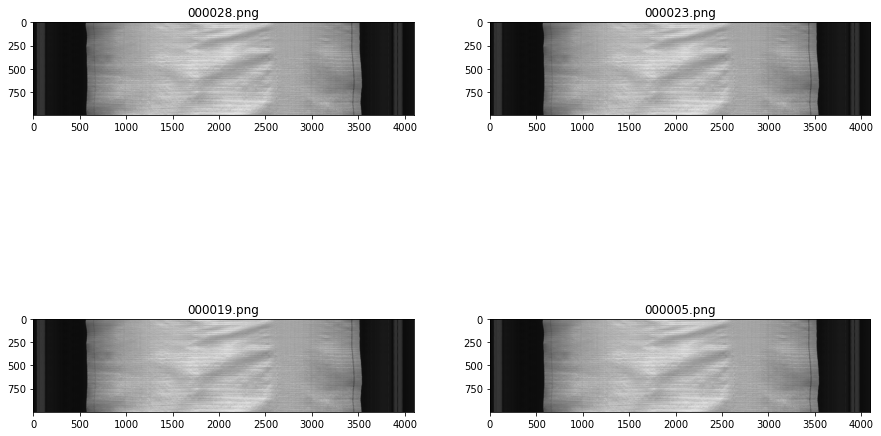

In [ ]:
i = 4
fig = plt.figure(figsize=(15, 10))
rows = 2
columns = 2
for j in dff["image_id"]:
    if (i>0):
        img = cv2.imread(img_path)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        plt.title(j)
        i = i-1;